In [88]:
# Среднеквадратическая ошибка (MSE).

# Даны матрица с наблюдениями, вектор с ответами и вектор с весовыми коэффициентами и записаны в переменные X, y и w соответственно. 
# Рассчитайте среднеквадратическую ошибку по формуле

# loss = ((y - X @ w)**2).mean(axis=0)

# Импорты

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# 1.3 Метод наименьших квадратов

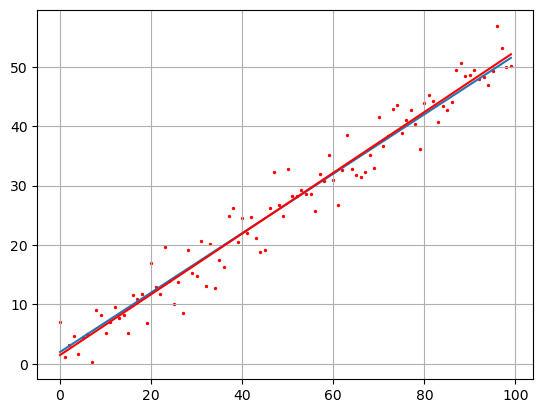

In [90]:
np.random.seed(7)

N = 100
sigma = 3
k = 0.5
b = 2

f = np.array([k*z+b for z in range(N)])
y = f + np.random.normal(0, sigma, N)

x = np.arange(N)

mx = x.sum() / N
my = y.sum() / N
a2 = (x.T @ x) / N
a11 = (x.T @ y) / N

kk = (a11 - mx*my) / (a2 - mx**2) # оценка коэффицианта k
bb = my - kk*mx                   # оценка коэффицианта b

ff = np.array([kk*z+bb for z in range(N)])

plt.plot(f)
plt.plot(ff, c='r')
plt.scatter(x, y, s=2, c='r')
plt.grid(True)
plt.show();

# 1.4 Линейная модель. Понятие переобучения

In [91]:
np.random.seed(0) # псевдослучайные числа образуют одну и ту же последовательность (при каждом запуске)
x = np.arange(-1.0, 1.0, 0.1) # аргумент [-1; 1] с шагом 0,1

size_train = len(x)  # размер выборки
w = [0.5, -0.3]  # коэффициенты модели
model_a = lambda m_x, m_w: (m_w[1] * m_x + m_w[0])  # модель
loss = lambda ax, y: (ax - y) ** 2 # квадратическая функция потерь

y = model_a(x, w) + np.random.normal(0, 0.1, len(x)) # целевые значения

In [92]:
print('Значения решающей функции\n', model_a(x, w))
print('Целевые значения\n', y.round(2))
print('Квадратическая функция потерь\n',loss(model_a(x, w), y))
print('Квадратическая ошибка\n', np.sum(loss(model_a(x, w), y)) / size_train)

Значения решающей функции
 [0.8  0.77 0.74 0.71 0.68 0.65 0.62 0.59 0.56 0.53 0.5  0.47 0.44 0.41
 0.38 0.35 0.32 0.29 0.26 0.23]
Целевые значения
 [0.98 0.81 0.84 0.93 0.87 0.55 0.72 0.57 0.55 0.57 0.51 0.62 0.52 0.42
 0.42 0.38 0.47 0.27 0.29 0.14]
Квадратическая функция потерь
 [0.03111881 0.00160126 0.00957928 0.05021602 0.03487773 0.00955072
 0.00902668 0.00022909 0.00010654 0.00168591 0.00020749 0.02114911
 0.00579178 0.00014805 0.00197015 0.00111339 0.02232272 0.0004209
 0.00098011 0.0072948 ]
Квадратическая ошибка
 0.010469526728196498


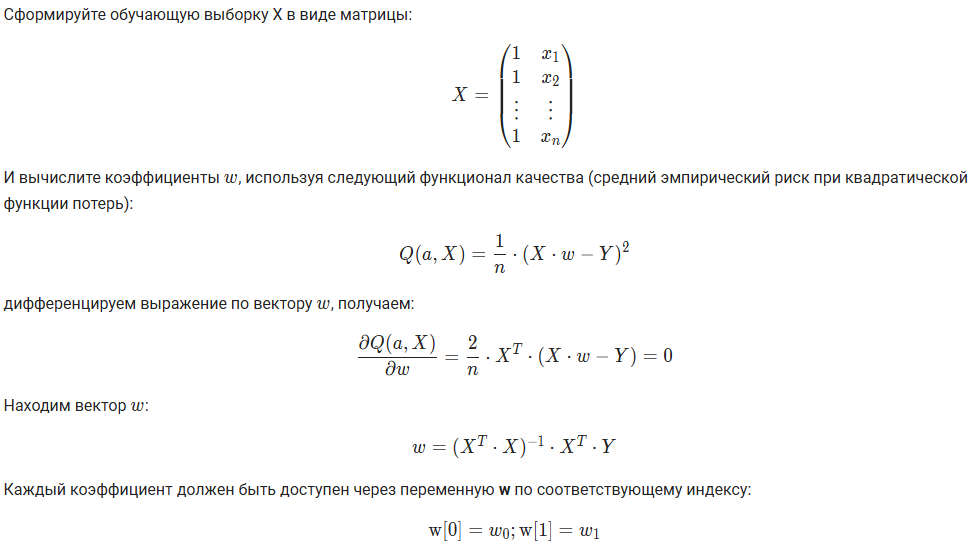

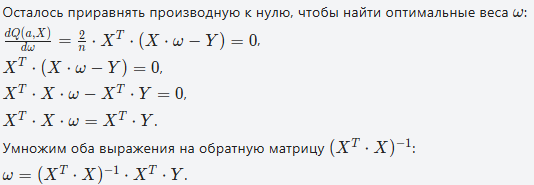

In [93]:
# Необходимо вычислить коэффициенты w модели: a(x,w)=w0 + w1 * x
# Алгоритм решения выше

np.random.seed(0) # псевдослучайные числа образуют одну и ту же последовательность (при каждом запуске)
x = np.arange(-1.0, 1.0, 0.1) # аргумент [-1; 1] с шагом 0,1


model_a = lambda xx, ww: (ww[0] + ww[1] * xx) # модель
Y = -5.2 + 0.7 * x + np.random.normal(0, 0.1, len(x)) # вектор целевых значений

# здесь продолжайте программу

print('x\n', x.round(2))
X = x.reshape(len(x), 1)
X = np.c_[np.ones(len(X)), X]
print('X\n', X.round(2))
X_T = np.transpose(X)
X_T_X = X_T @ X
X_T_X_inv = np.linalg.inv(X_T_X)
X_T_y = X_T @ Y
w = X_T_y @ X_T_X_inv
w

x
 [-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 -0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9]
X
 [[ 1.  -1. ]
 [ 1.  -0.9]
 [ 1.  -0.8]
 [ 1.  -0.7]
 [ 1.  -0.6]
 [ 1.  -0.5]
 [ 1.  -0.4]
 [ 1.  -0.3]
 [ 1.  -0.2]
 [ 1.  -0.1]
 [ 1.  -0. ]
 [ 1.   0.1]
 [ 1.   0.2]
 [ 1.   0.3]
 [ 1.   0.4]
 [ 1.   0.5]
 [ 1.   0.6]
 [ 1.   0.7]
 [ 1.   0.8]
 [ 1.   0.9]]


array([-5.14605924,  0.64014601])

In [94]:
np.random.seed(0) # псевдослучайные числа образуют одну и ту же последовательность (при каждом запуске)
x = np.arange(-1.0, 1.0, 0.1) # аргумент [-1; 1] с шагом 0,1


model_a = lambda xx, ww: (ww[0] + ww[1] * xx) # модель
Y = -5.2 + 0.7 * x + np.random.normal(0, 0.1, len(x)) # вектор целевых значений

# здесь продолжайте программу
ones = np.ones((len(x), 1))
X = np.hstack((ones, x.reshape(-1, 1)))
w = np.linalg.inv((X.T @ X)) @ X.T @ Y
w

array([-5.14605924,  0.64014601])

In [95]:
w = np.polyfit(x,Y,1)
w

array([ 0.64014601, -5.14605924])

In [96]:
N = len(x)

mx = x.sum() / N
my = Y.sum() / N
a2 = (x.T @ x) / N
a11 = (x.T @ Y) / N

kk = (a11 - mx*my) / (a2 - mx**2) # оценка коэффицианта k
bb = my - kk*mx                   # оценка коэффицианта b
w = np.array([bb, kk])
w

array([-5.14605924,  0.64014601])

In [97]:
np.random.seed(0) # псевдослучайные числа образуют одну и ту же последовательность (при каждом запуске)
x = np.arange(-1.0, 1.0, 0.1) # аргумент [-1; 1] с шагом 0,1


model_a = lambda xx, ww: (ww[0] + ww[1] * xx + ww[2] * xx ** 2 + ww[3] * xx ** 3) # модель
Y = np.sin(x * 5) + 2 * x + np.random.normal(0, 0.1, len(x)) # вектор целевых значений

X = np.array([[1, xx, xx**2, xx**3] for xx in x]) # обучающая выборка для поиска коэффициентов w модели a

# здесь продолжайте программу

w = np.linalg.inv((X.T @ X)) @ X.T @ Y
w

array([ 0.12132278,  4.16006063, -0.35256616, -4.19339165])

# 1.5 Способы оценивания степени переобучения моделей

Методы оценивания степени переобучения модели <br> <br>
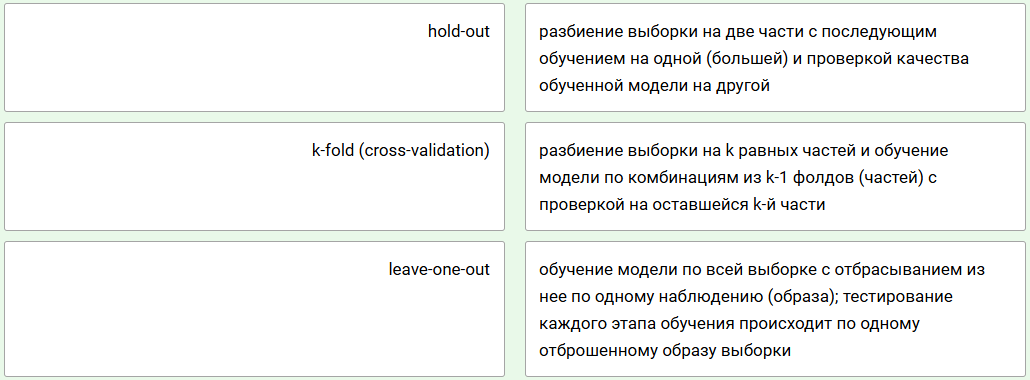

# 1.6 Уравнение гиперплоскости в задачах бинарной классификации

In [98]:
# На рисунке представлена разделяющая линия в пространстве двух признаков w1 * x1 + w2 * x2 + w0 = 0
#  Точками отмечены координаты, через которые проходит линия. Размер клеток по каждой из координат равен 1.

# Вычислите вручную (аналитически) по графику вектор параметров: w

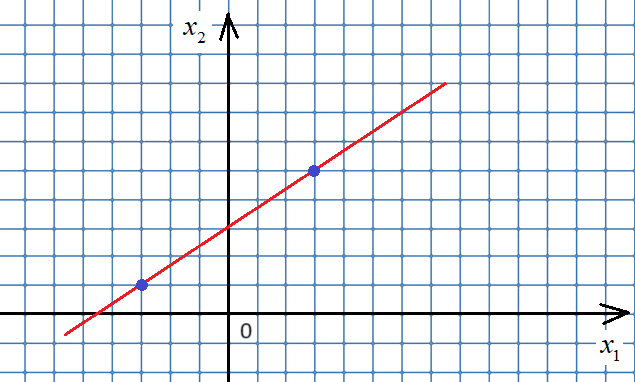

In [99]:
from sympy import symbols, Eq, solve

# w1 * x1 + w2 * x2 + w0 = 0

# Определение переменных
w1, w2, w0, x1, x2 = symbols('w1 w2 w0 x1 x2')

# Определение системы уравнений
equations = [
    Eq(-3 * w1 + w2 + 3, 0),
    Eq(3 * w1 + 5 * w2 + 3, 0)
]

# Решение системы символьно
symbolic_solution = solve(equations, (w1, w2))

# Вывод решения
print("Символьное решение:", symbolic_solution)

Символьное решение: {w1: 2/3, w2: -1}


In [100]:
exp = w1 * x1 + w2 * x2 + w0
exp = exp.subs({w1:2/3, w2:-1, w0:3})
exp.subs({x1:3, x2:5})

0

In [101]:
# Координаты точек прямой
p1, p2 = [3, 5], [-3, 1]

# Вычисляем угловой коэффициент k: k = (y2 - y1) / (x2 - x1)
k = (p2[1] - p1[1]) / (p2[0] - p1[0])

# Подставляем значения в уравнение для нахождения смещения b (w0): y = k*x + b
w0 = p1[1] - k * p1[0]

# Объявляем символьные переменные для коэффициентов w1, w2
w1, w2 = sp.symbols('w1 w2')

# Составляем уравнения на основе координат точек: w1*x1 + w2*x2 + w0 = 0
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in [p1, p2]]

# Решаем систему уравнений для w1, w2 и w0
solution = sp.solve(equations, (w1, w2))

w = [w0, solution[w1], solution[w2]]
print(f'w = {w}')

w = [3.0, 0.666666666666667, -1.00000000000000]


In [102]:
# Координаты точек прямой
p1, p2 = [3, 5], [-3, 1]

# Находим угловой коэффициент k и смещение b (w0)
k, w0 = np.polyfit([p1[0], p2[0]], [p1[1], p2[1]], 1)

# Объявляем символьные переменные для коэффициентов w1, w2
w1, w2 = sp.symbols('w1 w2')

# Составляем уравнения на основе координат точек: w1*x1 + w2*x2 + w0 = 0
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in [p1, p2]]

# Решаем систему уравнений для w1, w2 и w0
solution = sp.solve(equations, (w1, w2))

w = [w0, solution[w1], solution[w2]]
print(f'w = {w}')

w = [3.0, 0.666666666666667, -1.00000000000000]


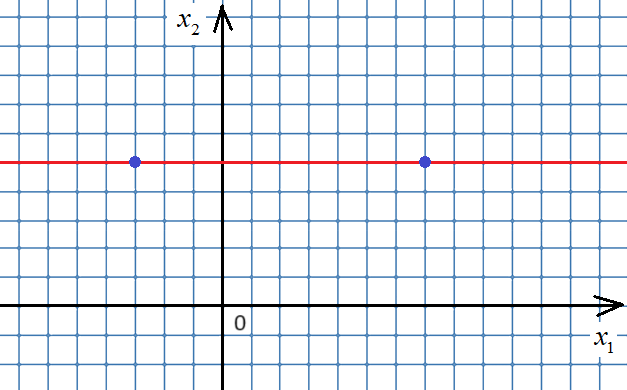

In [103]:
# Координаты точек прямой
p1, p2 = [-3, 5], [7, 5]

# Вычисляем угловой коэффициент k: k = (y2 - y1) / (x2 - x1)
k = (p2[1] - p1[1]) / (p2[0] - p1[0])

# Подставляем значения в уравнение для нахождения смещения b (w0): y = k*x + b
w0 = p1[1] - k * p1[0]

# Объявляем символьные переменные для коэффициентов w1, w2
w1, w2 = sp.symbols('w1 w2')

# Составляем уравнения на основе координат точек: w1*x1 + w2*x2 + w0 = 0
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in [p1, p2]]

# Решаем систему уравнений для w1, w2 и w0
solution = sp.solve(equations, (w1, w2))

w = [w0, solution[w1], solution[w2]]
print(f'w = {w}')

w = [5.0, 0.0, -1.00000000000000]


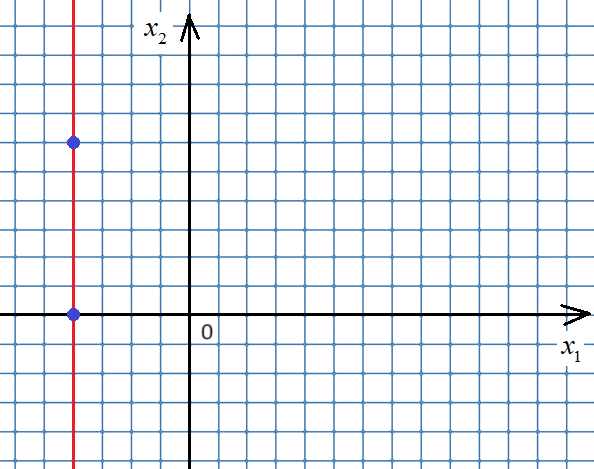

In [104]:
# Координаты точек прямой
p1, p2 = [-4, 0], [-4, 6]

# Находим угловой коэффициент k и смещение b (w0)
k, w0 = np.polyfit([p1[0], p2[0]], [p1[1], p2[1]], 1)

# Объявляем символьные переменные для коэффициентов w1, w2
w1, w2 = sp.symbols('w1 w2')

# Составляем уравнения на основе координат точек: w1*x1 + w2*x2 + w0 = 0
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in [p1, p2]]

# Решаем систему уравнений для w1, w2 и w0
solution = sp.solve(equations, (w1, w2))

w = [w0, solution[w1], solution[w2]]
print(f'w = {w}')

w = [1.5, 0.375000000000000, 0.0]


C:\Users\pong\AppData\Local\Temp\ipykernel_18804\108465155.py:5: RankWarning: Polyfit may be poorly conditioned
  k, w0 = np.polyfit([p1[0], p2[0]], [p1[1], p2[1]], 1)


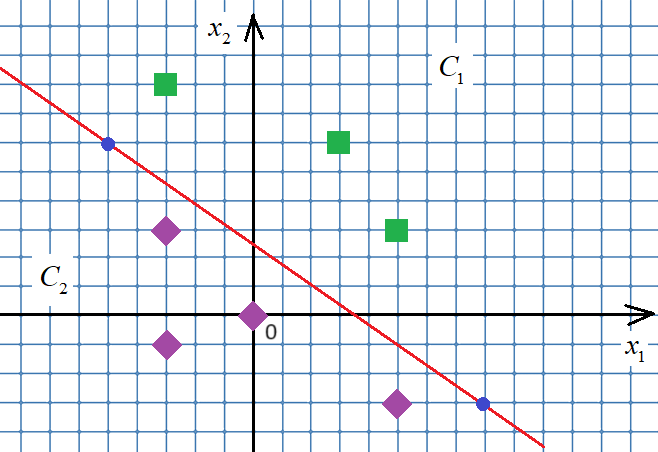

In [105]:
# Координаты точек прямой
p1, p2 = [-5, 6], [8, -3]

# Вычисляем угловой коэффициент k: k = (y2 - y1) / (x2 - x1)
k = (p2[1] - p1[1]) / (p2[0] - p1[0])

# Подставляем значения в уравнение для нахождения смещения b (w0): y = k*x + b
w0 = p1[1] - k * p1[0]

# Объявляем символьные переменные для коэффициентов w1, w2
w1, w2 = sp.symbols('w1 w2')

# Составляем уравнения на основе координат точек: w1*x1 + w2*x2 + w0 = 0
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in [p1, p2]]

# Решаем систему уравнений для w1, w2 и w0
solution = sp.solve(equations, (w1, w2))

w = [w0, solution[w1], solution[w2]]
print(f'w = {w}')

w = [2.5384615384615383, -0.692307692307692, -1.00000000000000]


In [106]:
x_test = [(5, -3), (-3, 8), (3, 6), (0, 0), (5, 3), (-3, -1), (-3, 3)]

X = np.column_stack(([1] * len(x_test), x_test))
predict = np.sign(X @ w)
predict

array([1, -1, -1, 1, -1, 1, 1], dtype=object)

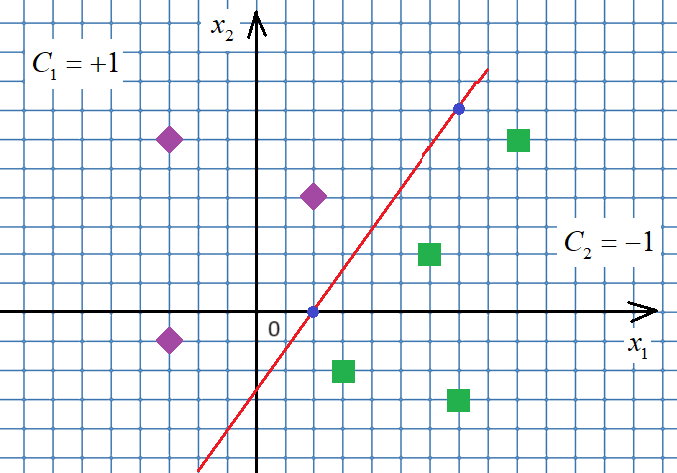

In [107]:
# Координаты точек прямой
p1, p2 = [2, 0], [7, 7]

# Вычисляем угловой коэффициент k: k = (y2 - y1) / (x2 - x1)
k = (p2[1] - p1[1]) / (p2[0] - p1[0])

# Подставляем значения в уравнение для нахождения смещения b (w0): y = k*x + b
w0 = p1[1] - k * p1[0]

# Объявляем символьные переменные для коэффициентов w1, w2
w1, w2 = sp.symbols('w1 w2')

# Составляем уравнения на основе координат точек: w1*x1 + w2*x2 + w0 = 0
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in [p1, p2]]

# Решаем систему уравнений для w1, w2 и w0
solution = sp.solve(equations, (w1, w2))

w = [w0, solution[w1], solution[w2]]
print(f'w = {w}')

w = [-2.8, 1.40000000000000, -1.00000000000000]


In [108]:
x_test = [(9, 6), (2, 4), (-3, -1), (3, -2), (-3, 6), (7, -3), (6, 2)]
# поменяли знак, так как w должен быть направлен так, чтобы скалярное произведение для образом с метками +1 было положительным, 
# иначе функция sign вернет не верную метку класса
w = [2.8, -1.40000000000000, 1.00000000000000] 
X = np.column_stack(([1] * len(x_test), x_test))
predict = np.sign(X @ w)
predict

array([-1.,  1.,  1., -1.,  1., -1., -1.])

# 1.7 Решение простой задачи бинарной классификации

In [109]:
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

n_train = len(x_train)                          # размер обучающей выборки
w = [0, -1]                                     # начальное значение вектора w
a = lambda x: np.sign(x @ np.array(w).T)        # решающее правило (a = lambda x: np.sign(x[0]*w[0] + x[1]*w[1]))
N = 50                                          # максимальное число итераций
L = 0.1                                         # шаг изменения веса
e = 0.1                                         # небольшая добавка для w0 чтобы был зазор между разделяющей линией и граничным образом

last_error_index = -1                           # индекс последнего ошибочного наблюдения

for n in range(N):
    for i in range(n_train):                # перебор по наблюдениям
        if y_train[i]*a(x_train[i]) < 0:    # если ошибка классификации,
            w[0] = w[0] + L * y_train[i]    # то корректировка веса w0
            last_error_index = i

    Q = sum([1 for i in range(n_train) if y_train[i]*a(x_train[i]) < 0])
    if Q == 0:      # показатель качества классификации (число ошибок)
        break       # останов, если все верно классифицируем

if last_error_index > -1:
    w[0] = w[0] + e * y_train[last_error_index]

print(w)

[1.6000000000000003, -1]


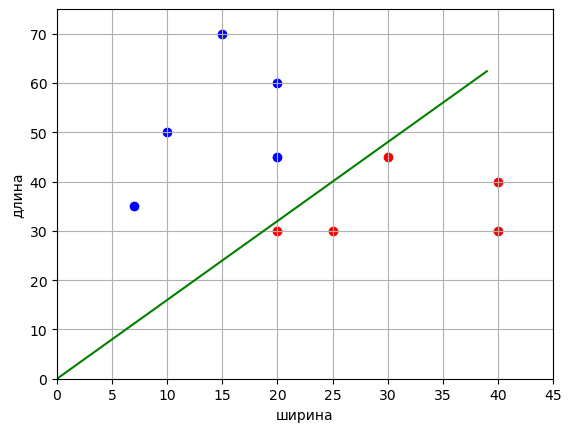

In [110]:
line_x = list(range(max(x_train[:, 0])))    # формирование графика разделяющей линии
line_y = [w[0]*x for x in line_x]

x_0 = x_train[y_train == 1]                 # формирование точек для 1-го
x_1 = x_train[y_train == -1]                # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show();

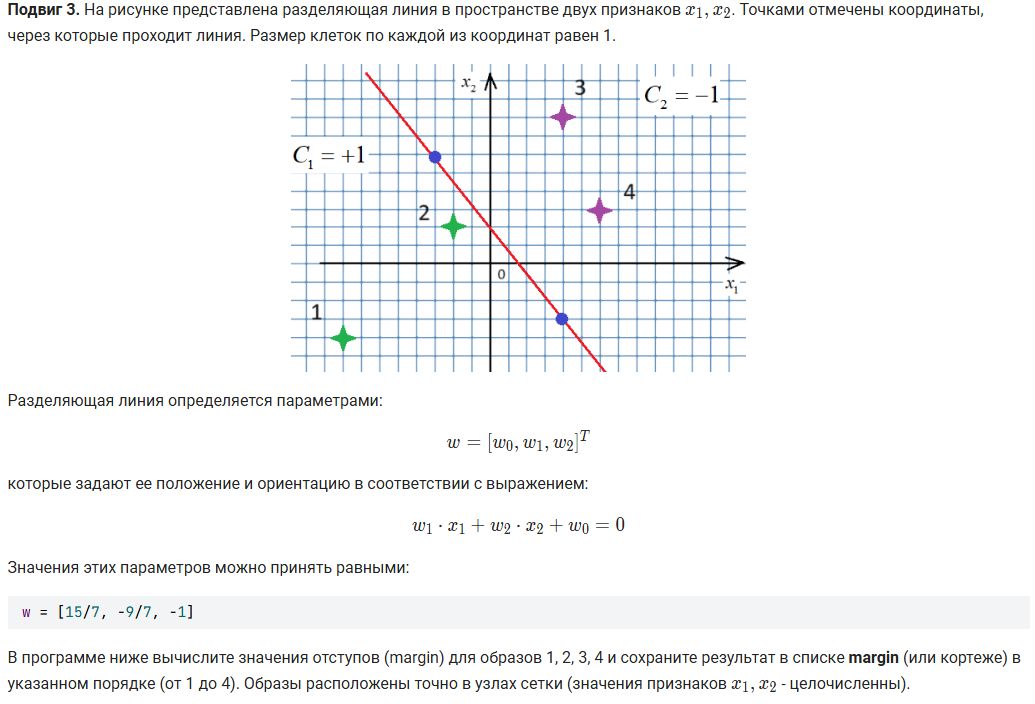

In [111]:
w = np.array([15/7, -9/7, -1])
x_test = np.array([[-8, -4], [-2, 2], [4, 8], [6, 3]]) # задайте самостоятельно (признаки образов: x0, x1, x2)
y_test = np.array([1, 1, -1, -1]) # задайте самостоятельно (метки класса)

# здесь продолжайте программу

margin = []

n_test = len(x_test)                          # размер обучающей выборки
w = [0, -1]                                     # начальное значение вектора w
a = lambda x: np.sign(x @ np.array(w).T)        # решающее правило (a = lambda x: np.sign(x[0]*w[0] + x[1]*w[1]))
N = 50                                          # максимальное число итераций
L = 0.1                                         # шаг изменения веса
e = 0.1                                         # небольшая добавка для w0 чтобы был зазор между разделяющей линией и граничным образом

last_error_index = -1                           # индекс последнего ошибочного наблюдения

for n in range(N):
    for i in range(n_test):                # перебор по наблюдениям
        if y_test[i]*a(x_test[i]) < 0:    # если ошибка классификации,
            w[0] = w[0] + L * y_test[i]    # то корректировка веса w0
            last_error_index = i

    Q = sum([1 for i in range(n_test) if y_test[i]*a(x_test[i]) < 0])
    if Q == 0:      # показатель качества классификации (число ошибок)
        break       # останов, если все верно классифицируем

if last_error_index > -1:
    w[0] = w[0] + e * y_test[last_error_index]

print(w)

[0.4, -1]


In [112]:
a = lambda x: x @ np.array(w).T
for i in range(n_test):                # перебор по наблюдениям
    print(a(x_test[i]))

0.7999999999999998
-2.8
-6.4
-0.5999999999999996


In [113]:
w = np.array([15/7, -9/7, -1])
x_test = np.array([[1, -8, -4],[1, -2, 2],[1, 4, 8],[1, 6, 3]]) # задайте самостоятельно (признаки образов: x0, x1, x2)
y_test = np.array([1, 1, -1, -1]) # задайте самостоятельно (метки класса)

n_test = len(x_test)
margin = []

# здесь продолжайте программу
a = lambda x: x @ w.T
for i in range(n_test):                # перебор по наблюдениям
    margin.append(y_test[i] * a(x_test[i]))
margin

[16.42857142857143, 2.7142857142857144, 11.0, 8.571428571428573]

In [114]:
w = np.array([15/7, -9/7, -1])
x_test = np.array([[1, -8, -4],[1, -2, 2],[1, 4, 8],[1, 6, 3]]) # задайте самостоятельно (признаки образов: x0, x1, x2)
y_test = np.array([1, 1, -1, -1]) # задайте самостоятельно (метки класса)

# здесь продолжайте программу
margin = y_test * (x_test @ w.T)
margin

array([16.42857143,  2.71428571, 11.        ,  8.57142857])

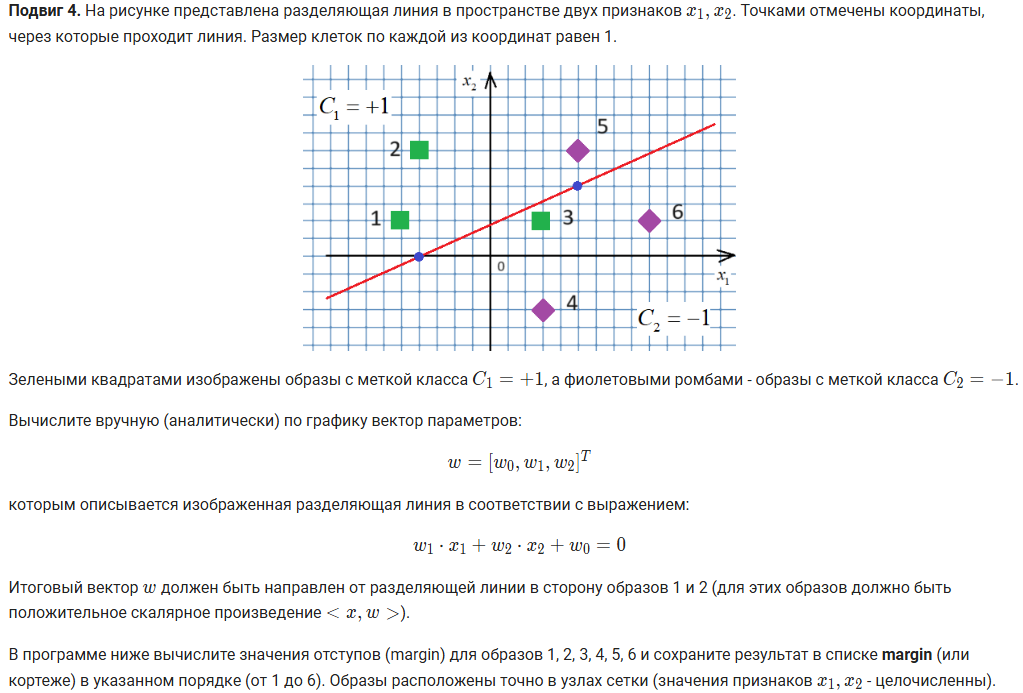

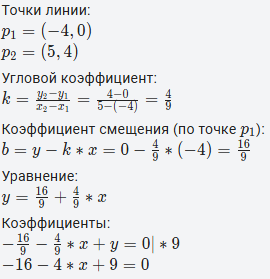

In [115]:
w = np.array([-16, -4, 9]) # задайте самостоятельно (параметры модели: w0, w1, w2 - ориентация разделяющей линии)
x_test = np.array(
    [[1, -5, 2], # 1
    [1, -4, 6], # 2
    [1, 3, 2],  # 3
    [1, 3, -3], # 4
    [1, 5, 6],  # 5
    [1, 9, 2],]  # 6
) # задайте самостоятельно (признаки образов: x0, x1, x2)

y_test = np.array([1, 1, 1, -1, -1, -1]) # задайте самостоятельно (метки класса)

# здесь продолжайте программу
margin = ((x_test @ w) * y_test).tolist()
margin

[22, 54, -10, 55, -18, 34]

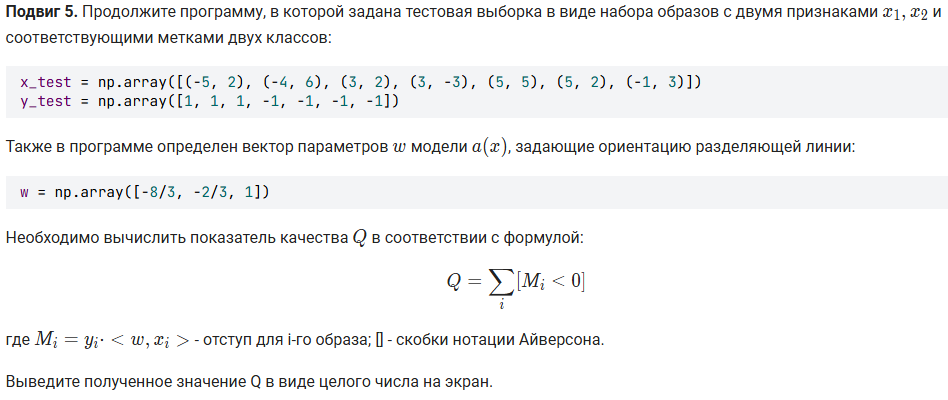

In [116]:
x_test = np.array([(-5, 2), (-4, 6), (3, 2), (3, -3), (5, 5), (5, 2), (-1, 3)])
y_test = np.array([1, 1, 1, -1, -1, -1, -1])
w = np.array([-8/3, -2/3, 1])

# Подготовка данных с добавлением единичного столбца
X = np.column_stack((np.ones(len(x_test)), x_test))

# Вычисление отступов M_i
margin = y_test * (X @ w)

# Считаем количество M_i, которые меньше 0
Q = np.sum(margin < 0)

# Выводим результат как целое число
print(Q)

2


# 1.8 Функции потерь в задачах линейной бинарной классификации

In [117]:
import numpy as np
import matplotlib.pyplot as plt

x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

pt = np.sum([x * y for x, y in zip(x_train, y_train)], axis=0)
xxt = np.sum([np.outer(x, x) for x in x_train], axis=0)
w = np.dot(pt, np.linalg.inv(xxt))
print(w)

[ 0.05793234 -0.0346272   0.1912188 ]


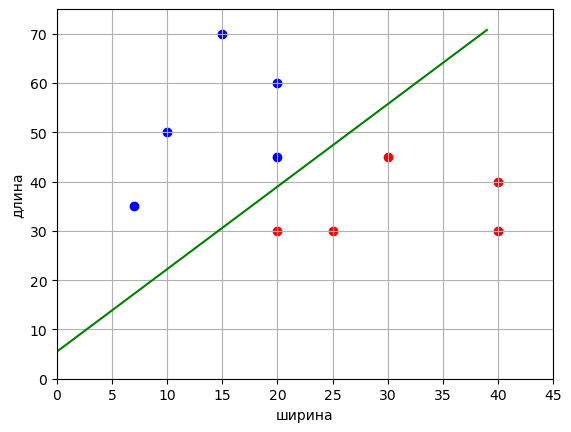

In [118]:
line_x = list(range(max(x_train[:, 0])))    # формирование графика разделяющей линии
line_y = [-x*w[0]/w[1] - w[2]/w[1] for x in line_x]

x_0 = x_train[y_train == 1]                 # формирование точек для 1-го
x_1 = x_train[y_train == -1]                # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show();

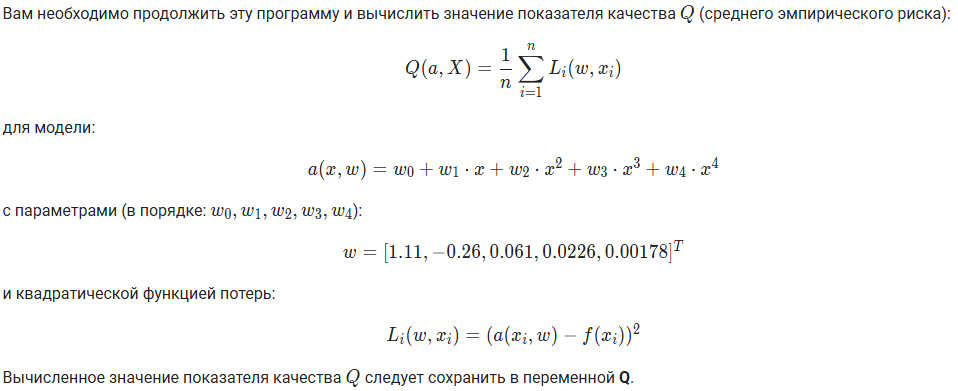

In [119]:
def func(x):
    return 0.1 * x**2 - np.sin(x) + 0.1 * np.cos(x * 5) + 1.


# здесь объявляйте дополнительные функции (если необходимо)


coord_x = np.arange(-5.0, 5.0, 0.1) # значения отсчетов по оси абсцисс
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x) # общее число отсчетов

# здесь продолжайте программу

w = np.array([1.11, -0.26, 0.061, 0.0226, 0.00178])

X = np.power(coord_x.reshape(-1, 1), np.arange(5))

a = np.sum(w * X, axis=1)

L = np.square(a - coord_y)
Q = np.mean(L)
Q

0.17749243683224197

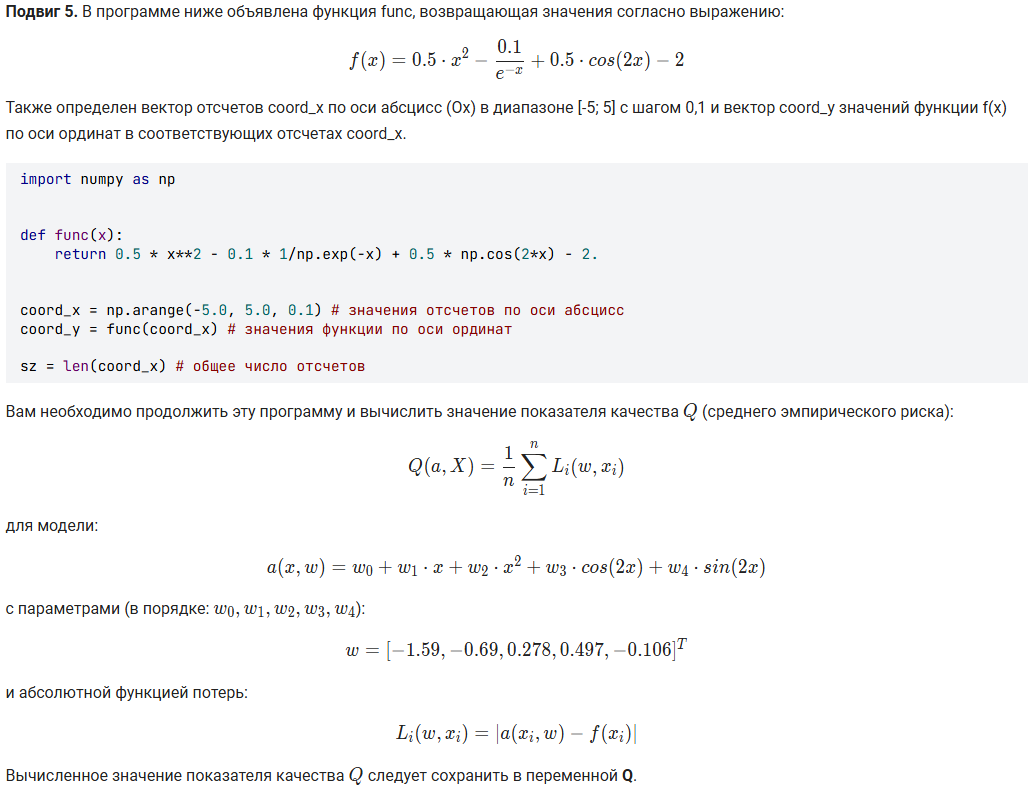

In [120]:
def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.


# здесь объявляйте дополнительные функции (если необходимо)


coord_x = np.arange(-5.0, 5.0, 0.1) # значения отсчетов по оси абсцисс
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x) # общее число отсчетов

# здесь продолжайте программу

X = np.array([[x**0] + [x**1] + [x**2] + [np.cos(2*x)] + [np.sin(2*x)] for x in coord_x])
w = np.array([-1.59, -0.69, 0.278, 0.497, -0.106]).T

a = np.sum(w * X, axis=1)

L = np.abs(a - coord_y)
Q = np.mean(L)
Q

0.9250026294525024

In [121]:
def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.

coord_x = np.arange(-5.0, 5.0, 0.1)
coord_y = func(coord_x)

sz = len(coord_x) 

model_a = lambda x, w: w @ np.array([1, x, x**2, np.cos(2*x), np.sin(2*x)])
loss = lambda a, y: abs(a-y)

w = np.array([-1.59, -0.69, 0.278, 0.497, -0.106])

Q = 1/sz * sum([loss(model_a(x, w), func(x)) for x in coord_x])
Q

0.9250026294525024

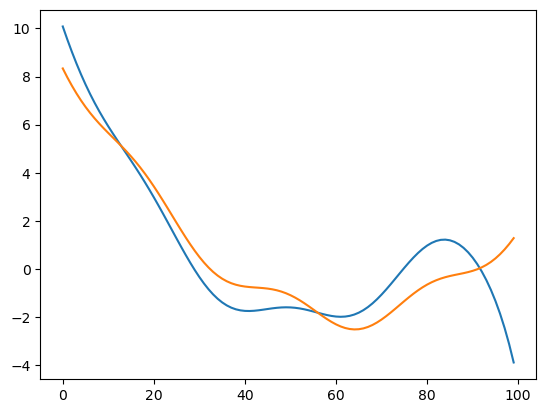

In [122]:
plt.plot(coord_y)
plt.plot(a)
plt.show();

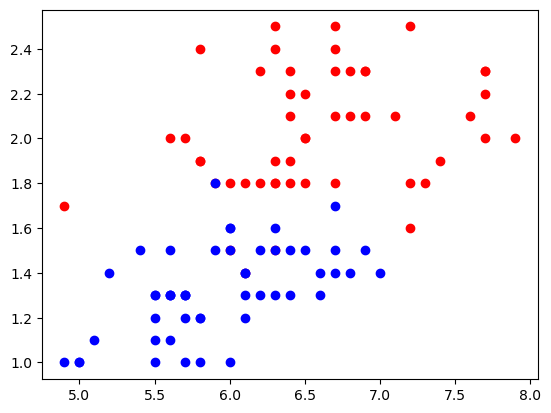

In [123]:
data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), 
          (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), 
          (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), 
          (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), 
          (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), 
          (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), 
          (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), 
          (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), 
          (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), 
          (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), 
          (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), 
          (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), 
          (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), 
          (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), 
          (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 
          -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 
          -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 
          -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]


data_x = np.array(data_x)
data_y = np.array(data_y)
x_0 = data_x[data_y == 1]                 # формирование точек для 1-го
x_1 = data_x[data_y == -1]                # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.show();

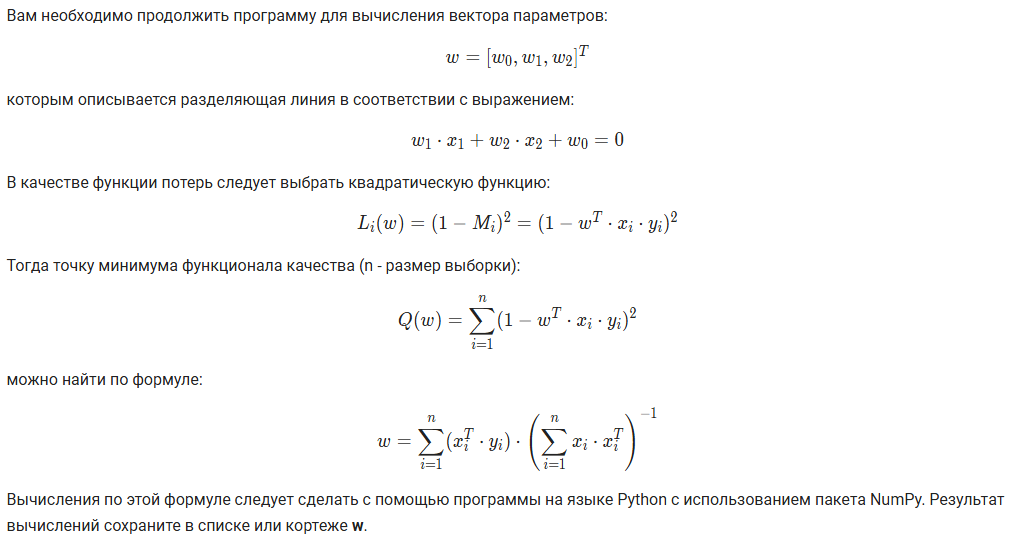

In [124]:
pt = np.sum([x * y for x, y in zip(data_x, data_y)], axis=0)
xxt = np.sum([np.outer(x, x) for x in data_x], axis=0)
w = np.dot(pt, np.linalg.inv(xxt))
print(w)

[-0.5740954  2.1656853]


In [125]:
data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), 
          (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), 
          (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), 
          (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), 
          (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), 
          (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), 
          (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), 
          (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), 
          (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), 
          (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), 
          (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), 
          (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), 
          (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), 
          (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), 
          (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 
          -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 
          -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 
          -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

# здесь продолжайте программу

x = np.hstack([np.ones(len(data_x)).reshape(-1, 1), data_x])
y = np.array(data_y)

w = np.dot(pt, np.linalg.inv(xxt))
w = (x.T @ y) @ (np.linalg.inv(x.T @ x))
w

array([-3.31307062,  0.00617453,  1.95370269])

# 2.1 Градиентный алгоритм (градиентный спуск)

In [126]:
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

def f(x):
    return x*x - 5*x + 5

def df(x):
    return 2*x - 5

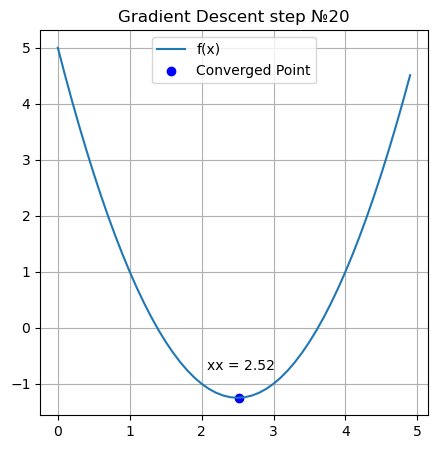

In [127]:
N = 20      # число итераций
xx = 5      # начальное значение
lmd = 0.1   # шаг сходимости

x_plt = np.arange(0, 5.0, 0.1)
f_plt = [f(x) for x in x_plt]

for i in range(N + 1):
    xx = xx - lmd * df(xx)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.grid(True)
    ax.plot(x_plt, f_plt, label='f(x)')
    ax.set_title(" ".join(["Gradient Descent", f"step №{i}"]))
    
    if i == N:
        ax.scatter(xx, f(xx), c='blue', label='Converged Point')
    else:
        ax.scatter(xx, f(xx), c='red', label='Current Point')

    ax.text(xx+0.5, f(xx)+0.5, f'xx = {xx:.2f}', fontsize=10, ha='right')

    ax.legend()
    plt.show()
    
    time.sleep(0.1)
    display.clear_output(wait=True)

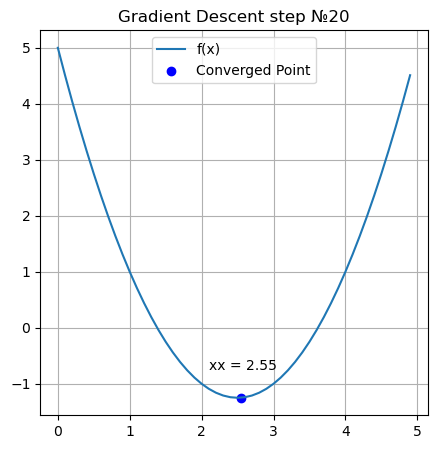

In [128]:
N = 20      # число итераций
xx = 5      # начальное значение
lmd = 0.1   # шаг сходимости
mn = 100

x_plt = np.arange(0, 5.0, 0.1)
f_plt = [f(x) for x in x_plt]

for i in range(N + 1):
    lmd = 1 / min(i + 1, mn)
    xx = xx - lmd * np.sign(df(xx))

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.grid(True)
    ax.plot(x_plt, f_plt, label='f(x)')
    ax.set_title(" ".join(["Gradient Descent", f"step №{i}"]))
    
    if i == N:
        ax.scatter(xx, f(xx), c='blue', label='Converged Point')
    else:
        ax.scatter(xx, f(xx), c='red', label='Current Point')

    ax.text(xx+0.5, f(xx)+0.5, f'xx = {xx:.2f}', fontsize=10, ha='right')

    ax.legend()
    plt.show()
    
    time.sleep(0.1)
    display.clear_output(wait=True)

In [129]:
# Застревание в локальном минимуме

def f(x):
    return np.sin(x) + 0.5*x

def df(x):
    return np.cos(x) + 0.5

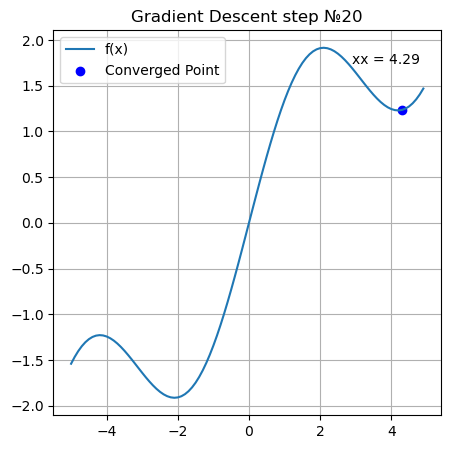

In [130]:
N = 20      # число итераций
xx = 5      # начальное значение
lmd = 0.1   # шаг сходимости

x_plt = np.arange(-5.0, 5.0, 0.1)
f_plt = [f(x) for x in x_plt]

for i in range(N + 1):
    xx = xx - lmd * df(xx)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.grid(True)
    ax.plot(x_plt, f_plt, label='f(x)')
    ax.set_title(" ".join(["Gradient Descent", f"step №{i}"]))
    
    if i == N:
        ax.scatter(xx, f(xx), c='blue', label='Converged Point')
    else:
        ax.scatter(xx, f(xx), c='red', label='Current Point')

    ax.text(xx+0.5, f(xx)+0.5, f'xx = {xx:.2f}', fontsize=10, ha='right')

    ax.legend()
    plt.show()
    
    time.sleep(0.1)
    display.clear_output(wait=True)

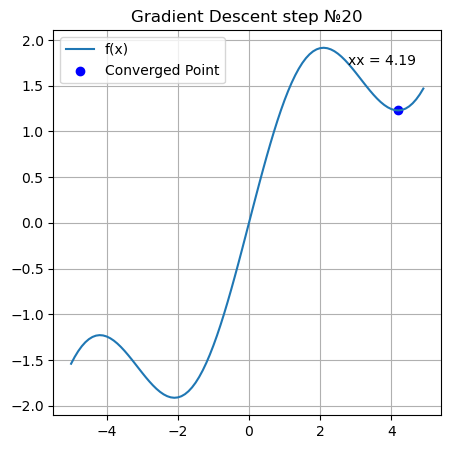

In [131]:
N = 20      # число итераций
xx = 5      # начальное значение
lmd = 0.1   # шаг сходимости
mn = 100

x_plt = np.arange(-5.0, 5.0, 0.1)
f_plt = [f(x) for x in x_plt]

for i in range(N + 1):
    lmd = 1 / min(i + 1, mn)
    xx = xx - lmd * np.sign(df(xx))

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.grid(True)
    ax.plot(x_plt, f_plt, label='f(x)')
    ax.set_title(" ".join(["Gradient Descent", f"step №{i}"]))
    
    if i == N:
        ax.scatter(xx, f(xx), c='blue', label='Converged Point')
    else:
        ax.scatter(xx, f(xx), c='red', label='Current Point')

    ax.text(xx+0.5, f(xx)+0.5, f'xx = {xx:.2f}', fontsize=10, ha='right')

    ax.legend()
    plt.show()
    
    time.sleep(0.1)
    display.clear_output(wait=True)

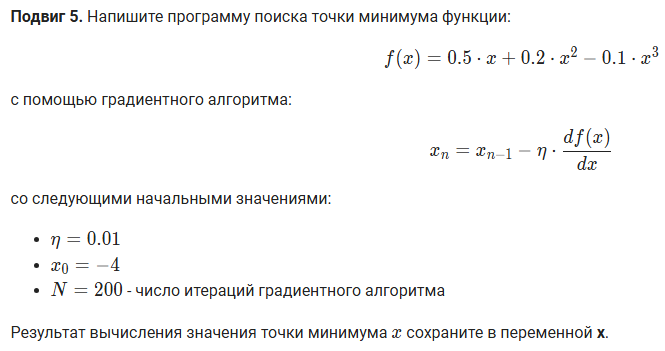

In [132]:
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.1 * x ** 3


def df(x):
    return 0.5 + 0.4 * x - 0.3 * x**2


coord_x = np.arange(-5.0, 5.0, 0.1) # значения по оси абсцисс
coord_y = func(coord_x) # значения по оси ординат (значения функции)

# здесь продолжайте программу

x = -4      # начальное значение
lmd = 0.01   # шаг сходимости
N = 200      # число итераций

for i in range(N + 1):
    x = x - lmd * df(x)
x

-1.0731224592893855

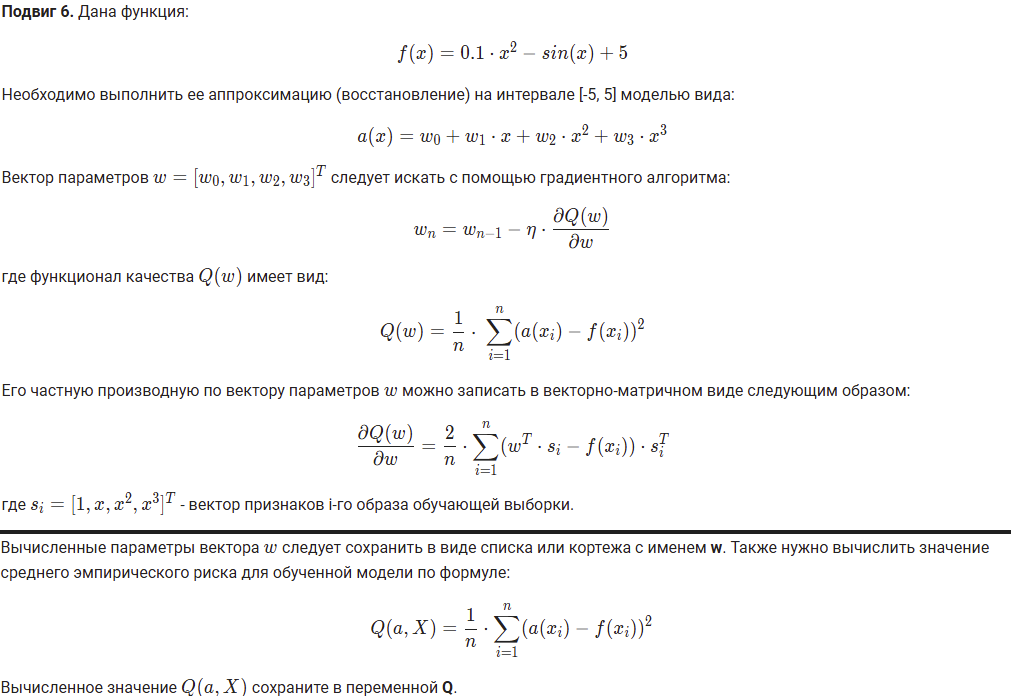

In [133]:
# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.1 * x**2 - np.sin(x) + 5.

# здесь объявляйте необходимые функции

coord_x = np.arange(-5.0, 5.0, 0.1) # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]) # начальные значения параметров модели
N = 200 # число итераций градиентного алгоритма

X = np.power(coord_x.reshape(-1, 1), range(4))
for i in range(N):
    y_pred = X @ w
    w = w - eta * 2 * ((y_pred - coord_y) * X.T).mean(axis=1)

Q = np.square(y_pred - coord_y).mean()
Q

0.1306179121981542

In [134]:
def func(x):
    """Исходная функция"""
    return 0.1 * x**2 - np.sin(x) + 5.

def model(x, w):
    """Модель a(x)"""
    return w[0] + w[1] * x + w[2] * x**2 + w[3] * x**3

def loss(y_true, y_pred):
    """Функция потерь (среднеквадратичная ошибка)"""
    return np.mean((y_true - y_pred) ** 2)

def gradients(x, y_true, w):
    """Градиенты для параметров w"""
    y_pred = model(x, w)
    error = y_pred - y_true
    grad_w0 = 2 * np.mean(error)
    grad_w1 = 2 * np.mean(error * x)
    grad_w2 = 2 * np.mean(error * x**2)
    grad_w3 = 2 * np.mean(error * x**3)
    return np.array([grad_w0, grad_w1, grad_w2, grad_w3])

coord_x = np.arange(-5.0, 5.0, 0.1)  # Значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x)  # Значения функции по оси ординат

sz = len(coord_x)  # Количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001])  # Шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.])  # Начальные значения параметров модели
N = 200  # Число итераций градиентного алгоритма

# Градиентный спуск
for i in range(N):
    grads = gradients(coord_x, coord_y, w)
    w = w - eta * grads  # Обновление параметров

Q = loss(model(coord_x, w), coord_y)
Q

0.13061463936073703

In [135]:
# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.1 * x**2 - np.sin(x) + 5.

# здесь объявляйте необходимые функции

coord_x = np.arange(-5.0, 5.0, 0.1).reshape(-1, 1) # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001]).reshape(-1, 1) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]).reshape(-1, 1) # начальные значения параметров модели
N = 200 # число итераций градиентного алгоритма

# здесь продолжайте программу
X = np.power(coord_x, np.arange(4))
y = coord_y

for i in range(N):
    gradient = 2 / sz * X.T @ (X @ w - y)
    w = w - eta * gradient

Q = np.mean((X @ w - y)**2)
Q

0.13061463936073706

# 2.2 Стохастический градиентный спуск SGD и алгоритм SAG

In [136]:
# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))


# производная сигмоидной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y


# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = 0.0005  # шаг сходимости SGD
lm = 0.01  # скорость "забывания" для Q
N = 500  # число итераций SGD

Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

for i in range(N):
    k = np.random.randint(0, n_train - 1)  # случайный индекс
    ek = loss(w, x_train[k], y_train[k])  # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q  # пересчет показателя качества
    Q_plot.append(Q)

print(w)
print(Q_plot)

[ 0.32784547 -0.15041692  0.0058554 ]
[1.0, 1.0, 0.9957287486394392, 0.989994141237192, 0.9820242478975971, 0.9884124057146649, 0.9815963372664308, 0.9880069815890711, 0.980809190047208, 0.973055959057758, 0.9639858388821839, 0.9724887252411173, 0.9803997002872823, 0.987939587792594, 0.9925593434507154, 0.9851326761887971, 0.9897026915561805, 0.9821399098523206, 0.9856917642274693, 0.9885581143849297, 0.9899535644566096, 0.9890197382586322, 0.983602792887054, 0.9888814322251842, 0.9849339658106052, 0.9881946646417175, 0.9822503824563625, 0.9748888221721747, 0.9794906400256252, 0.971496233828282, 0.9630020593132738, 0.9691420362158495, 0.9610740796697316, 0.9526003156901439, 0.9447376574617121, 0.9359196014694469, 0.9271011692176392, 0.9304236429482832, 0.9219914113004715, 0.9142309408172167, 0.9076583684324283, 0.9136846405195794, 0.9171577820194675, 0.910645585291382, 0.9143248362763399, 0.9132270656851907, 0.9098184105954408, 0.9034162504473325, 0.9032285168593154, 0.8976398464817505

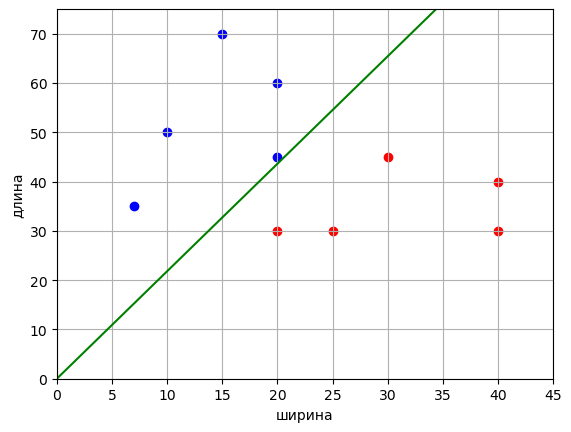

In [137]:
line_x = list(range(max(x_train[:, 0])))  # формирование графика разделяющей линии
line_y = [-x * w[0] / w[1] - w[2] / w[1] for x in line_x]

x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == -1]  # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show();

In [138]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def E(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return np.dot((y-ff).T, (y-ff))

def dEda(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return -2*np.dot((y - ff).T, range(N))

def dEdb(y, a, b):
    ff = np.array([a * z + b for z in range(N)])
    return -2*(y - ff).sum()


N = 100       # число экспериментов
Niter = 50 # число итераций
sigma = 3   # стандартное отклонение наблюдаемых значений
at = 0.5     # теоретическое значение параметра k
bt = 2       # теоретическое значение параметра b

aa = 0
bb = 0
lmd1 = 0.000001
lmd2 = 0.0005

f = np.array([at*z+bt for z in range(N)])
y = np.array(f + np.random.normal(0, sigma, N))

a_plt = np.arange(-1, 2, 0.1)
b_plt = np.arange(0, 3, 0.1)
E_plt = np.array([[E(y, a, b) for a in a_plt] for b in b_plt])

plt.ion()   # включение интерактивного режима отображения графиков
fig = plt.figure()
ax = Axes3D(fig)

a, b = np.meshgrid(a_plt, b_plt)
ax.plot_surface(a, b, E_plt, color='y', alpha=0.5)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('E')

point = ax.scatter(aa, bb, E(y, aa, bb), c='red')  # отображение точки красным цветом

for n in range(Niter):
    aa = aa - lmd1 * dEda(y, aa, bb)
    bb = bb - lmd2 * dEdb(y, aa, bb)

    ax.scatter(aa, bb, E(y, aa, bb), c='red')

    # перерисовка графика и задержка на 10 мс
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.01)

    print(aa, bb)

0.3477085696268186 0.948633911431457
0.45768544585653403 1.258018894382677
0.4923775961349782 1.3647392351604766
0.5032308799518679 1.4070637869668923
0.5065377992233226 1.4287866331989652
0.5074580084315156 1.443782159227276
0.5076254605450079 1.4564492446909687
0.5075575427094793 1.468185814894159
0.5074180344715307 1.4794392938548757
0.5072587318517319 1.4903559728875249
0.5070959681399316 1.50098666439032
0.506934847511793 1.5113518338521224
0.5067769196224812 1.5214622294198377
0.50662261006196 1.5313254177553612
0.5064719900253114 1.540947856438743
0.5063250200237644 1.5503355527614442
0.5061816270286387 1.5594942747777476
0.5060417288654506 1.5684296205002015
0.5059052419033758 1.5771470421126803
0.505772083455332 1.5856518558817283
0.5056421725038049 1.5939492474839303
0.5055154298972839 1.6020442758281912
0.505391778379857 1.609941876349289
0.5052711425687656 1.6176468640831798
0.5051534489162524 1.6251639366236221
0.5050386256671942 1.6324976769928583
0.5049266028161371 1.639

<Figure size 640x480 with 0 Axes>

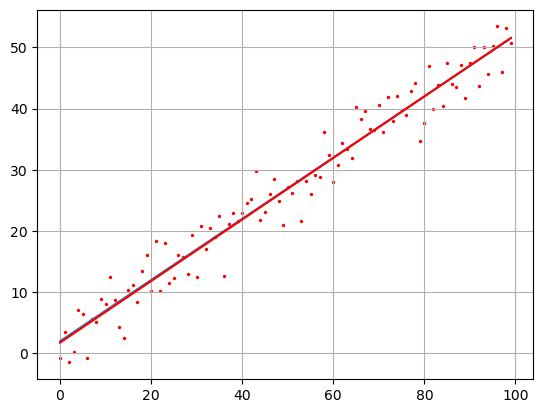

In [139]:
plt.ioff()   # выключение интерактивного режима отображения графиков
plt.show()

# отображение графиков аппроксимации
ff = np.array([aa*z+bb for z in range(N)])

plt.scatter(range(N), y, s=2, c='red')
plt.plot(f)
plt.plot(ff, c='red')
plt.grid(True)
plt.show();

Подвиг 6. Дана функция: <br>
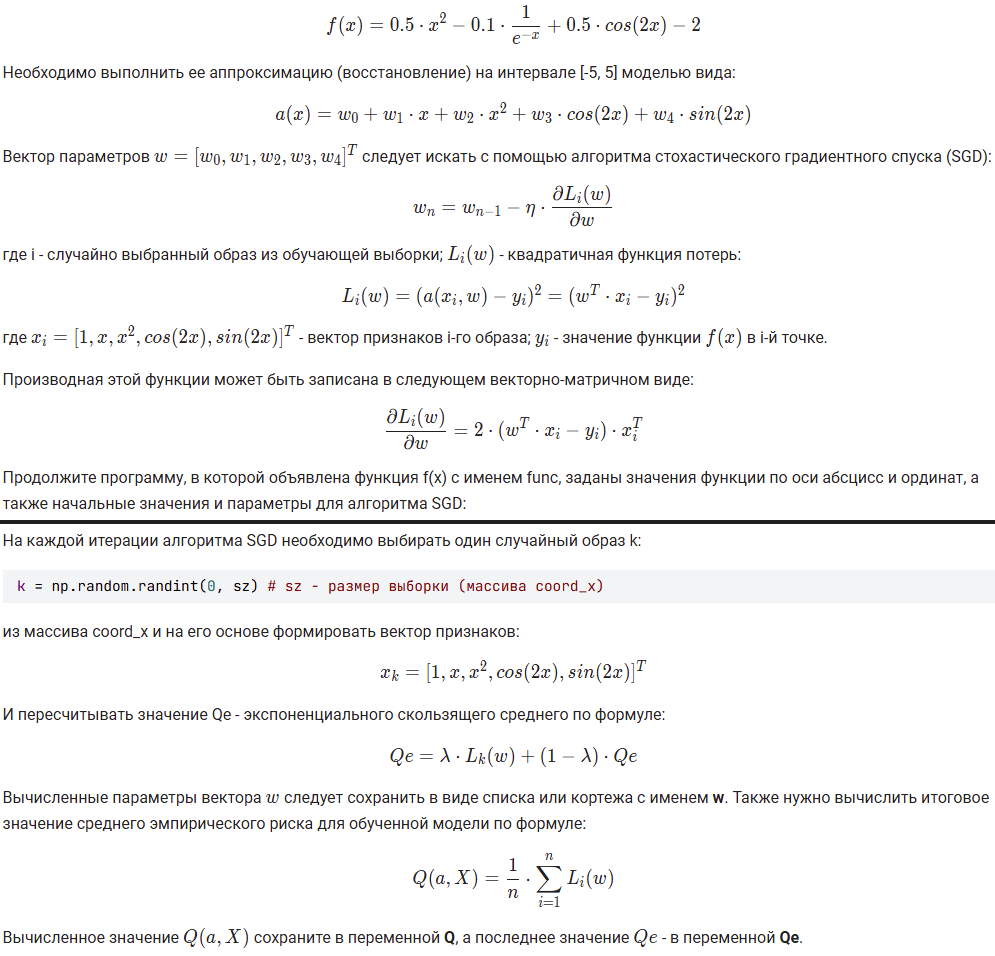

In [140]:
# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x ** 2 - 0.1 * 1 / np.exp(-x) + 0.5 * np.cos(2 * x) - 2.


def model(x, w):
    w0, w1, w2, w3, w4 = w
    return w0 + w1 * x + w2 * x ** 2 + w3 * np.cos(2 * x) + w4 * np.sin(2 * x)


def loss_i(coord_x, coord_y, w, i):
    return (model(coord_x[i], w) - coord_y[i]) ** 2


def gradient_k(coord_x, coord_y, w, k):
    xi = lambda x: np.array([1, x, x ** 2, np.cos(2 * x), np.sin(2 * x)])
    s = xi(coord_x[k])
    grad = (np.dot(w, s) - coord_y[k]) * s
    return 2 * grad


coord_x = np.arange(-5.0, 5.0, 0.1)
coord_y = func(coord_x)
sz = len(coord_x)

eta = np.array([0.01, 0.001, 0.0001, 0.01, 0.01])
w = np.array([0., 0., 0., 0., 0.])
N = 500
lm = 0.02

Qe = np.sum([loss_i(coord_x, coord_y, w, i) for i in range(sz)]) / sz

np.random.seed(0)

for i in range(N):
    k = np.random.randint(0, sz)
    w -= eta * gradient_k(coord_x, coord_y, w, k)
    Qe = lm * loss_i(coord_x, coord_y, w, k) + (1 - lm) * Qe

Q = np.sum([loss_i(coord_x, coord_y, w, i) for i in range(sz)]) / sz

w

array([-1.55870287, -0.77127223,  0.28664769,  0.8162054 , -0.14011833])

In [141]:
np.random.seed(0)

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.

# здесь объявляйте необходимые функции
def L(w: np.array, x: np.array, y: np.array) -> np.array:
    """
    L_i(w)ф-ция потерь (она же MSE) 
    она же loses = (y_pred - y_train) ** 2
    Возвращает вектор [w[0]., ... w[n].] с разницей значений прогнозируемой и тренировочной выборок
    """
    return (w @ x - y)**2

def d_L(w: np.array, x: np.array, y: np.array) -> np.array:
    """
    dL_i(w)/dw -> градиент
    Производная L_i ф-ции для поиска градиента
    """
    return 2*(w @ x - y) * x.T

coord_x = np.arange(-5.0, 5.0, 0.1) # знач. по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x) # знач. ф-ции по оси ординат

X_i = np.array([[1, x, x**2, np.cos(2*x), np.sin(2*x)] for x in coord_x])

sz = len(coord_x)	# количество значений функций (точек)

eta = np.array([0.01, 0.001, 0.0001, 0.01, 0.01]) # шаг обучения η для каждого параметра w0, w1, w2, w3, w4

N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда λ для вычисления скользящего экспоненциального среднего

# 1. инициализация весов w некоторыми начальными значениями параметров модели
w = np.array([0., 0., 0., 0., 0.])

# 2. Начальное вычисление функционала качества(среднего эмпирического риска) 
# Q(w) = 1/sz * sum(L_i(w))
Qe = 1/sz * np.sum((X_i @ w.T - coord_y)**2) 

# 3. цикл sgd
for i in range(N):
    # 4. Случайный выбор наблюдений
    k = np.random.randint(sz-1)
    x_k = X_i[k]
    y_k = coord_y[k]

    # 5. Вычисление ф-ции потерь и градиента
    eps_k = L(w, x_k, y_k)
    dL_k = d_L(w, x_k, y_k)

    # 6. Шаг псевдоградиентного алгоритма (обновление параметров w)
    w = w - eta * dL_k

    # 7. Пересчет функционала качества
    # Q = λ * eps_k + (1-λ)*Q 
    # где 𝜀_k = L_k(w) - ф-ция потерь на текущей итерации
    Qe = lm * eps_k + (1-lm) * Qe

# Li = (X_i @ w.T - coord_y) ** 2
Li = sum((L(w,x, y) for x,y in zip(X_i, coord_y)))

# Q(a,X_i) = 1/sz * sum(L_i(w))
Q = 1/sz * np.sum(Li)

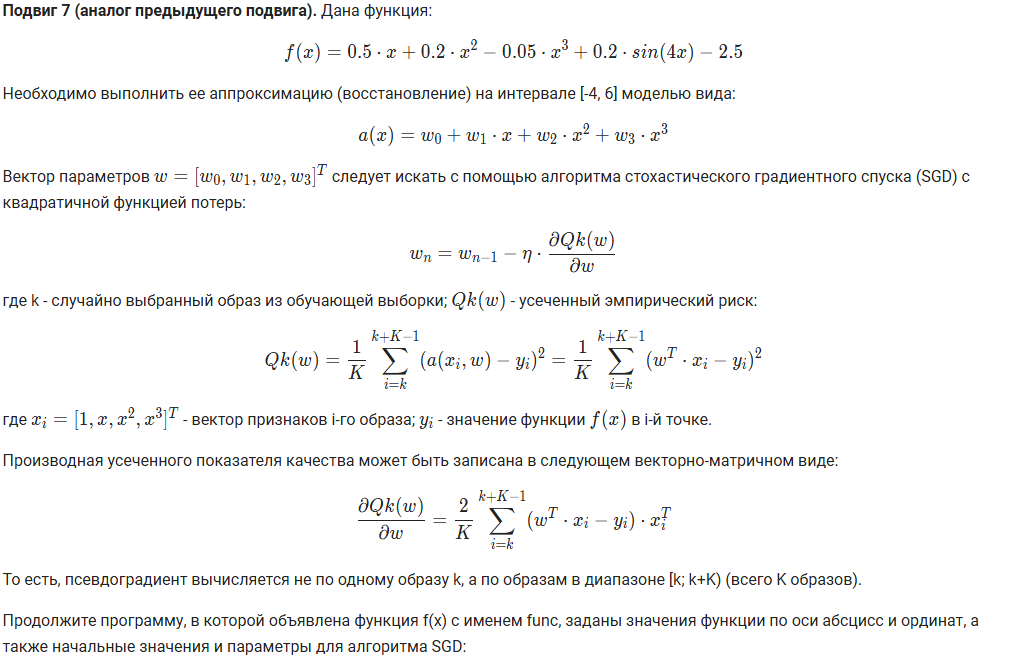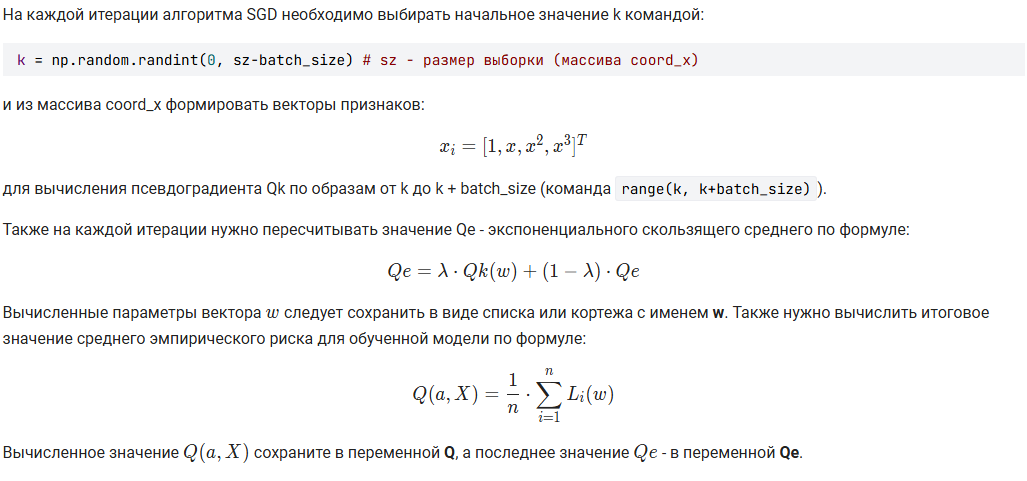

In [142]:
import numpy as np

def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5

def model_a(w, x):
    return w @ x


def loss(w, x):
    return (model_a(w, x) - func(x[1]))**2


def grad_loss(w, x):
    return 2 * (model_a(w, x) - func(x[1])) * x.T

coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат
sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]) # начальные значения параметров модели
N = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 50 # размер мини-батча (величина K = 50)

X = np.array([[xi**n for n in range(len(w))] for xi in coord_x])
Qe = 1/sz * sum(loss(w, xi) for xi in X)

np.random.seed(0)

for _ in range(N):
    k = np.random.randint(0, sz-batch_size-1)
    Qk = 1/batch_size * sum([loss(w, X[i]) for i in range(k, k + batch_size)])
    grad_Qk = 1/batch_size * np.sum([grad_loss(w, X[i]) for i in range(k, k + batch_size)], axis=0)
    w = w - eta * grad_Qk
    Qe = lm * Qk + (1-lm) * Qe

Q = 1/sz * sum(loss(w, xi) for xi in X)
Q

0.020387085479140803

# 2.3 Пример использования SGD при бинарной классификации образов

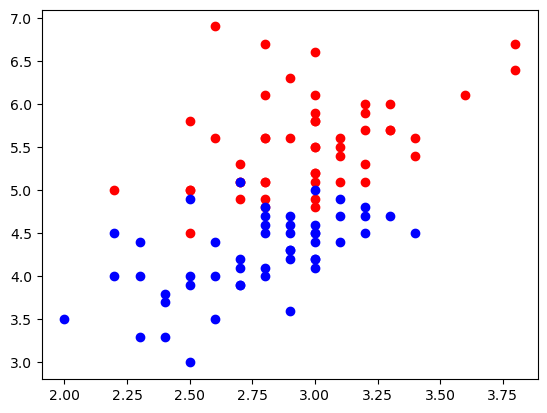

In [143]:
# Подвиг 4. В программе дана следующая обучающая выборка для задачи бинарной классификации:

data_x = [(3.0, 4.9), (2.7, 3.9), (3.0, 5.5), (2.6, 4.0), (2.9, 4.3), (3.1, 5.1), (2.2, 4.5), (2.3, 3.3), (2.7, 5.1), (3.3, 5.7), 
          (2.8, 5.1), (2.8, 4.9), (2.5, 4.5), (2.8, 4.7), (3.2, 4.7), (3.2, 5.7), (2.8, 6.1), (3.6, 6.1), (2.8, 4.8), (2.9, 4.5), 
          (3.1, 4.9), (2.3, 4.4), (3.3, 6.0), (2.6, 5.6), (3.0, 4.4), (2.9, 4.7), (2.8, 4.0), (2.5, 5.8), (2.4, 3.3), (2.8, 6.7), 
          (3.0, 5.1), (2.3, 4.0), (3.1, 5.5), (2.8, 4.8), (2.7, 5.1), (2.5, 4.0), (3.1, 4.4), (3.8, 6.7), (3.1, 5.6), (3.1, 4.7), 
          (3.0, 5.8), (3.0, 5.2), (3.0, 4.5), (2.7, 4.9), (3.0, 6.6), (2.9, 4.6), (3.0, 4.6), (2.6, 3.5), (2.7, 5.1), (2.5, 5.0), 
          (2.0, 3.5), (3.2, 5.9), (2.5, 5.0), (3.4, 5.6), (3.4, 4.5), (3.2, 5.3), (2.2, 4.0), (2.2, 5.0), (3.3, 4.7), (2.7, 4.1), 
          (2.4, 3.7), (3.0, 4.2), (3.2, 6.0), (3.0, 4.2), (3.0, 4.5), (2.7, 4.2), (2.5, 3.0), (2.8, 4.6), (2.9, 4.2), (3.1, 5.4), 
          (2.5, 4.9), (3.2, 5.1), (2.8, 4.5), (2.8, 5.6), (3.4, 5.4), (2.7, 3.9), (3.0, 6.1), (3.0, 5.8), (3.0, 4.1), (2.5, 3.9), 
          (2.4, 3.8), (2.6, 4.4), (2.9, 3.6), (3.3, 5.7), (2.9, 5.6), (3.0, 5.2), (3.0, 4.8), (2.7, 5.3), (2.8, 4.1), (2.8, 5.6), 
          (3.2, 4.5), (3.0, 5.9), (2.9, 4.3), (2.6, 6.9), (2.8, 5.1), (2.9, 6.3), (3.2, 4.8), (3.0, 5.5), (3.0, 5.0), (3.8, 6.4)]

data_y = [1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 
          -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 
          1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1]


data_x = np.array(data_x)
data_y = np.array(data_y)

x_0 = data_x[data_y == 1]                 # формирование точек для 1-го
x_1 = data_x[data_y == -1]                # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')

plt.show();

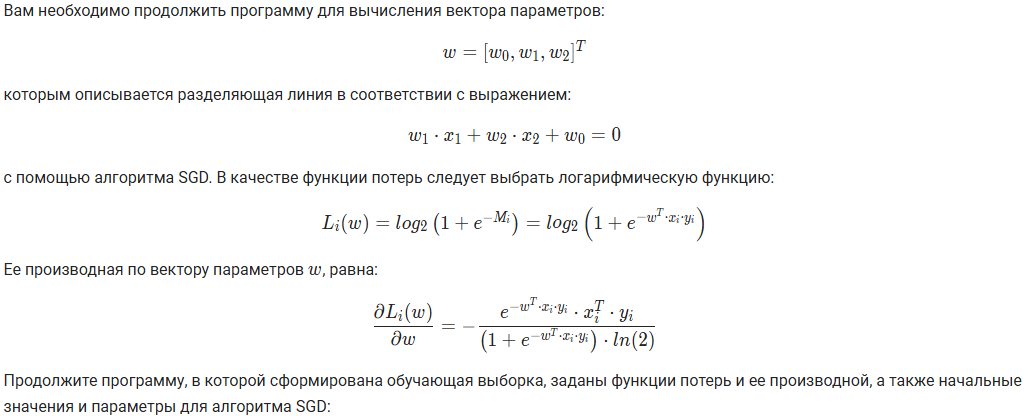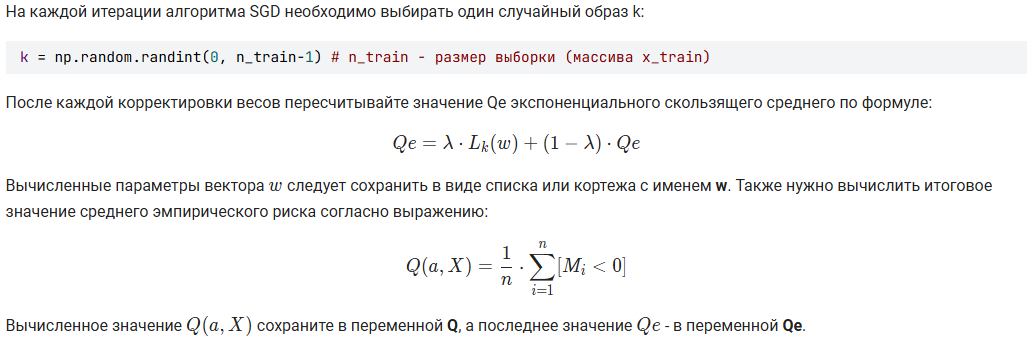

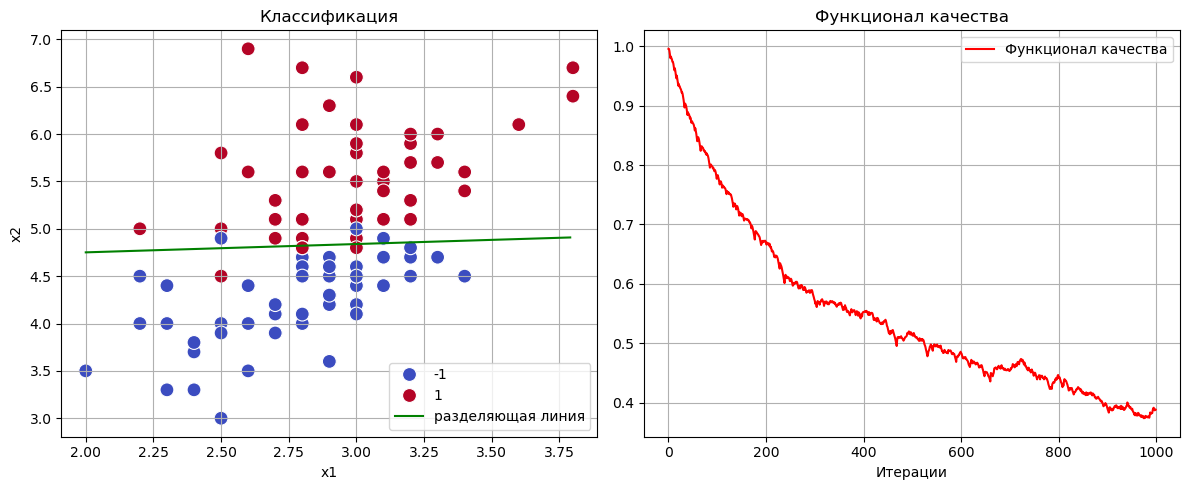

In [144]:
import numpy as np

# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))

# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])   # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 1000  # число итераций алгоритма SGD

Q_plot = []

Qe = np.mean([loss(w,x,y) for x,y in zip(x_train, y_train)])# начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел
for i in range(N):
    k = np.random.randint(0, n_train-1)
    x_k = x_train[k]
    y_k = y_train[k]
    
    w = w - nt * df(w, x_k, y_k)
    Qe = lm * loss(w, x_k, y_k) + (1 - lm) * Qe

    Q_plot.append(Qe)
    
Q = np.mean((x_train @ w) * y_train < 0)

# Пострение графика

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=x_train[:, 1], y=x_train[:, 2], hue=y_train, s=100, ax=ax1, palette='coolwarm')

line_x = np.arange(min(x_train[:, 1]), max(x_train[:, 1]), 0.01)
line_y = -(w[0] + w[1] * line_x) / w[2]

ax1.plot(line_x, line_y, color='g', label="разделяющая линия")
ax1.set_ylabel('x2')
ax1.legend()
ax1.set_xlabel('x1')
ax1.grid()
ax1.set_title('Классификация')

ax2.plot(Q_plot, color='r', label='Функционал качества')
ax2.set_xlabel('Итерации')
ax2.legend()
ax2.grid()
ax2.set_title('Функционал качества')

plt.tight_layout()

plt.show();

In [145]:
from matplotlib import colormaps
print(colormaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted

# 2.5 L2-регуляризатор. Математическое обоснование и пример работы

In [146]:
def predict_poly(x, koeff):
    res = 0
    xx = [x ** (len(koeff) - n - 1) for n in range(len(koeff))]

    for i, k in enumerate(koeff):
        res += k * xx[i]

    return res


x = np.arange(0, 10.1, 0.1)
y = 1 / (1 + 10 * np.square(x))

x_train, y_train = x[::2], y[::2]

N = len(x)

z_train = np.polyfit(x_train, y_train, 10)
print(z_train)

[-1.26252985e-07  5.76781414e-06 -1.05030157e-04  9.09286288e-04
 -2.58708457e-03 -1.92393634e-02  2.13797583e-01 -8.96937855e-01
  1.95728683e+00 -2.19007649e+00  1.02203201e+00]


[ 4.81599670e+02  7.76410934e+00 -2.86336666e+00 -1.08870683e+00
 -1.09751482e+00 -1.85022999e-01  6.58695291e-01 -3.03710850e-01
  6.88142280e-02 -8.98795876e-03  6.90368012e-04 -2.90713392e-05
  5.19226088e-07]


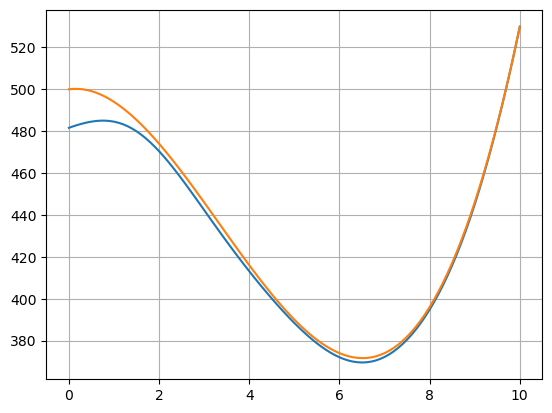

In [147]:
x = np.arange(0, 10.1, 0.1)
y = np.array([a ** 3 - 10 * a ** 2 + 3 * a + 500 for a in x])  # функция в виде полинома x^3 - 10x^2 + 3x + 500
x_train, y_train = x[::2], y[::2]
N = 13  # размер признакового пространства (степень полинома N-1)
L = 20  # при увеличении N увеличивается L (кратно): 12; 0.2   13; 20    15; 5000

X = np.array([[a ** n for n in range(N)] for a in x])  # матрица входных векторов
IL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)])  # матрица lambda*I
IL[0][0] = 0  # первый коэффициент не регуляризуем
X_train = X[::2]  # обучающая выборка
Y = y_train  # обучающая выборка

# вычисление коэффициентов по формуле w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(X_train.T @ X_train + IL)
w = A @ X_train.T @ Y
print(w)

# отображение исходного графика и прогноза
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy)
plt.plot(x, y)
plt.grid(True)
plt.show();

# Tail

In [ ]:
numbers = [45, 35, 25, 55, 15, 65, 95, 85, 105, 75]

n = len(numbers)
for i in range(n - 1):
    for j in range(n - i - 1):
        if numbers[j] > numbers[j + 1]:
            numbers[j], numbers[j + 1] = numbers[j + 1], numbers[j]
numbers

[15, 25, 35, 45, 55, 65, 75, 85, 95, 105]

In [8]:
# Чтение чисел из stdin
numbers = [45, 35, 25, 55, 15, 65, 95, 85, 105, 75]

# Допишите ваш код здесь

def bubble_sort_mod(numbers):
    n = len(numbers)
    for i in range(n - 1):
        swaped = False
        for j in range(n - i - 1):
            if numbers[j] > numbers[j + 1]:
                numbers[j], numbers[j + 1] = numbers[j + 1], numbers[j]
                swaped = True
        if not swaped:
            break
            
bubble_sort_mod(numbers)

print(numbers)

[15, 25, 35, 45, 55, 65, 75, 85, 95, 105]


In [15]:
# Чтение чисел из stdin
numbers = [45, 35, 25, 55, 15, 65, 95, 85, 105, 75]

# Допишите ваш код здесь

def selection_sort(numbers):
    n = len(numbers)
    for i in range(n - 1):
        min_index = i
        for j in range(i + 1, n):
            if numbers[j] < numbers[min_index]:
                min_index = j

        min_value = numbers.pop(min_index)
        numbers.insert(i, min_value)
            
selection_sort(numbers)

print(numbers)

[15, 25, 35, 45, 55, 65, 75, 85, 95, 105]


In [17]:
# Чтение чисел из stdin
numbers = [45, 35, 25, 55, 15, 65, 95, 85, 105, 75]

# Допишите ваш код здесь

def selection_sort(numbers):
    n = len(numbers)
    for i in range(n - 1):
        min_index = i
        for j in range(i + 1, n):
            if numbers[j] < numbers[min_index]:
                numbers[min_index], numbers[j] = numbers[j], numbers[min_index]
            
selection_sort(numbers)

print(numbers)

[15, 25, 35, 45, 55, 65, 75, 85, 95, 105]


In [ ]:
# Чтение чисел из stdin
numbers = [45, 35, 25, 55, 15, 65, 95, 85, 105, 75]

# Допишите ваш код здесь

def insertion_sort(numbers):
    n = len(numbers)
    for i in range(1, n):
        insert_index = i
        current_value = numbers[i]
        for j in range(i - 1, -1, -1):
            if numbers[j] > current_value:
                numbers[j + 1] = numbers[j]
                insert_index = j
            else:
                break
        numbers[insert_index] = current_value
            
insertion_sort(numbers)

print(numbers)

[15, 25, 35, 45, 55, 65, 75, 85, 95, 105]
[15, 25, 35, 45, 55, 65, 75, 85, 95, 105]
